# **PROJECT TITLE -  Healthcare Analytics: Hip Replacement Efficiency Analysis**

# **Project Introduction**

## **Hip Replacement Efficiency – Data Preprocessing & EDA**

### **Objective**
Analyze hospital inpatient discharge dataset for **hip replacement surgeries** to:

- Understand patient & hospital patterns
- Clean & preprocess data (missing values, duplicates, outliers)
- Create new features for efficiency analysis
- Perform EDA to study costs & length of stay
- Identify factors affecting hospital efficiency

### **Main Goals**

- Handle missing values, duplicates, outliers
- Standardize categorical fields
- Engineer features like `charge_to_cost_ratio` & `efficiency_index`
- Explore cost & Length of Stay trends through visualizations
- Build a simple baseline ML model for LOS prediction

### **Dataset Overview**

- **Source:** Technocolabs – Hip Replacement EffiCare project  
- **Rows:** ~26,594  
- **Columns:** 30 (demographics, hospital info, outcomes, financial variables)
- **Key Analysis Features:** `length_of_stay`, `total_charges`, `total_costs`



-----

## **1. Dataset Familiarization**
- Load dataset
- View first few rows
- Check shape, datatypes
- Understand columns

In [1]:
import pandas as pd

df = pd.read_csv("Efficare Data/hospital_inpatient_discharges_totalhipreplacement.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26594 entries, 0 to 26593
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   health_service_area                  26594 non-null  object 
 1   hospital_county                      26594 non-null  object 
 2   operating_certificate_number         26594 non-null  int64  
 3   facility_id                          26594 non-null  int64  
 4   facility_name                        26594 non-null  object 
 5   age_group                            26594 non-null  object 
 6   zip_code_3_digits                    26574 non-null  object 
 7   gender                               26594 non-null  object 
 8   race                                 26594 non-null  object 
 9   ethnicity                            26594 non-null  object 
 10  length_of_stay                       26594 non-null  int64  
 11  type_of_admission           

np.int64(8)

## **2. Data Preprocessing**

### **Handling Missing Values**
- Checked missing values using `df.isnull().sum()`
- Only `zip_code_3_digits` had missing values → filled with `"Unknown"` (if done)
(Code + output image here)

### **Removed Duplicates**
- `df.duplicated().sum()` → Removed duplicates using `df.drop_duplicates()`

### **Outlier Treatment (IQR Method)**
- Outliers detected in `total_costs`, `total_charges`, `length_of_stay`
- Applied IQR to remove extreme values
(Code + before-after row count screenshot here)

### **Feature Engineering**
Created new columns:

- `charge_to_cost_ratio = total_charges / total_costs`
- `efficiency_index   = length_of_stay / total_costs`


In [2]:
# Checking Missing Values 
df.isnull().sum().sort_values(ascending=False) 


zip_code_3_digits                      20
health_service_area                     0
operating_certificate_number            0
facility_id                             0
facility_name                           0
hospital_county                         0
age_group                               0
gender                                  0
race                                    0
ethnicity                               0
length_of_stay                          0
type_of_admission                       0
patient_disposition                     0
discharge_year                          0
ccs_diagnosis_code                      0
ccs_diagnosis_description               0
ccs_procedure_code                      0
ccs_procedure_description               0
apr_drg_code                            0
apr_drg_description                     0
apr_mdc_code                            0
apr_mdc_description                     0
apr_severity_of_illness_code            0
apr_severity_of_illness_descriptio

In [36]:
# Removed Duplicates
df.duplicated().sum()



np.int64(8)

In [37]:
df = df.drop_duplicates()


In [38]:
# Outlier removal using IQR for 3 numerical columns

def remove_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"{column} --> lower:{lower:.2f},  upper:{upper:.2f}")
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ['length_of_stay','total_charges','total_costs']:
    before = df.shape[0]
    df = remove_outliers_IQR(df, col)
    after = df.shape[0]
    print(f"{col}: Removed {before-after} rows")

df.shape   # check remaining rows


length_of_stay --> lower:0.50,  upper:4.50
length_of_stay: Removed 2087 rows
total_charges --> lower:-24335.14,  upper:124289.68
total_charges: Removed 1023 rows
total_costs --> lower:-806.96,  upper:36511.19
total_costs: Removed 683 rows


(22793, 30)

In [39]:
#Feature Engineering (After outlier removal)
 
#Charge to Cost Ratio
df['charge_to_cost_ratio'] = df['total_charges'] / df['total_costs']

#Efficiency Index
df['efficiency_index'] = df['length_of_stay'] / df['total_costs']

#View new columns
df[['length_of_stay','total_charges','total_costs','charge_to_cost_ratio','efficiency_index']].head()


,length_of_stay,total_charges,total_costs,charge_to_cost_ratio,efficiency_index
1,4,34289.25,16657.95,2.058432,0.000240
2,3,30436.00,14703.62,2.069966,0.000204
3,3,28699.00,13903.30,2.064186,0.000216
4,2,18421.00,8258.43,2.230569,0.000242
5,3,29040.00,13950.49,2.081647,0.000215


In [40]:
#Feature Engineering - Columns Describe

df[['length_of_stay','total_charges','total_costs']].describe()


,length_of_stay,total_charges,total_costs
count,22793.000000,22793.000000,22793.000000
mean,2.269118,51089.044570,17883.534091
std,0.864485,23912.370845,5845.131608
min,1.000000,458.000000,64.450000
25%,2.000000,30655.660000,13072.250000
50%,2.000000,46903.210000,17164.820000
75%,3.000000,65242.000000,22127.120000
max,4.000000,124252.090000,36466.460000


## **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis was conducted to understand patterns in patient stay duration, treatment cost variations, and hospital-level performance. Various visualizations were used to explore the distribution of features, detect trends, and derive actionable insights.

---

### **3.1 Numerical Feature Distribution**

Histograms were plotted for `length_of_stay`, `total_charges`, and `total_costs` to observe data spread and skewness.

**Key Observations:**
- Length of stay is mostly **2–4 days**, indicating short recovery duration.
- `total_charges` and `total_costs` exhibit **right-skewed distributions**, confirming presence of high-value outliers.
- Majority of patient bills fall within a moderate range, with few extreme cost cases.

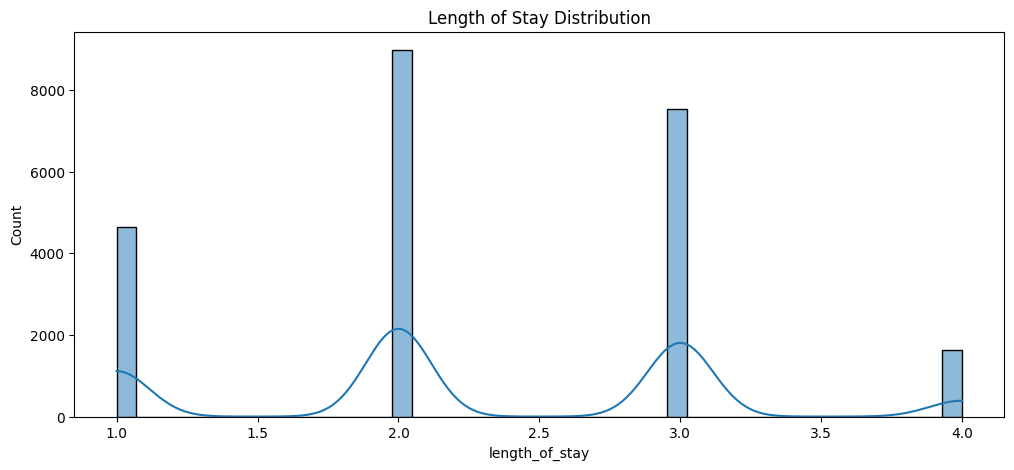

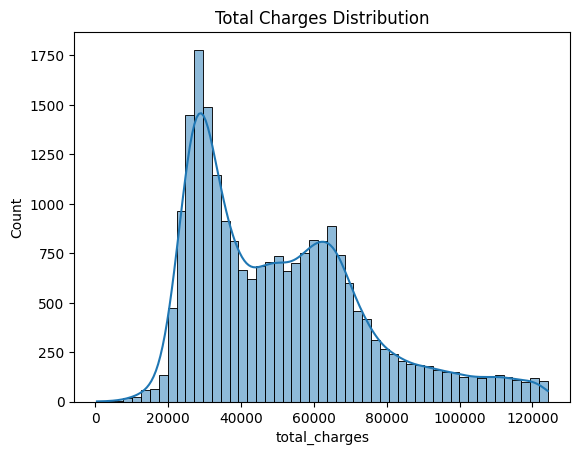

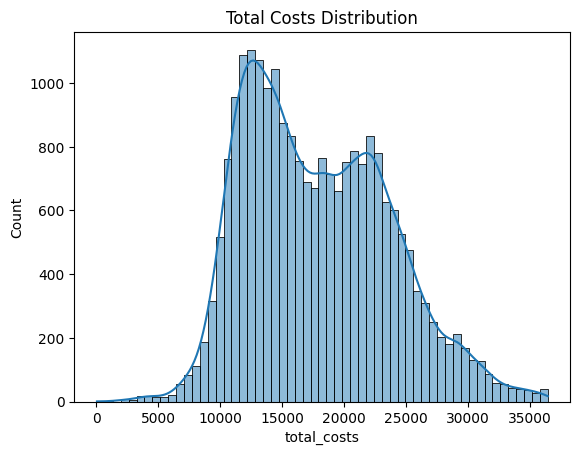

In [ ]:
# 3.1 Histogram — Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(df['length_of_stay'], kde=True)
plt.title("Length of Stay Distribution")
plt.show()

sns.histplot(df['total_charges'], kde=True)
plt.title("Total Charges Distribution")
plt.show()

sns.histplot(df['total_costs'], kde=True)
plt.title("Total Costs Distribution")
plt.show()




### **3.2 Boxplots for Outlier Visualization**

Boxplots were used to visually detect extreme values in cost and stay durations.

**Insights:**
- Outliers were prominent in `total_charges` and `total_costs`.
- IQR method was later applied to cap/remove these outliers and stabilize variance.
- LOS outliers represent rare long-stay cases (special medical conditions).

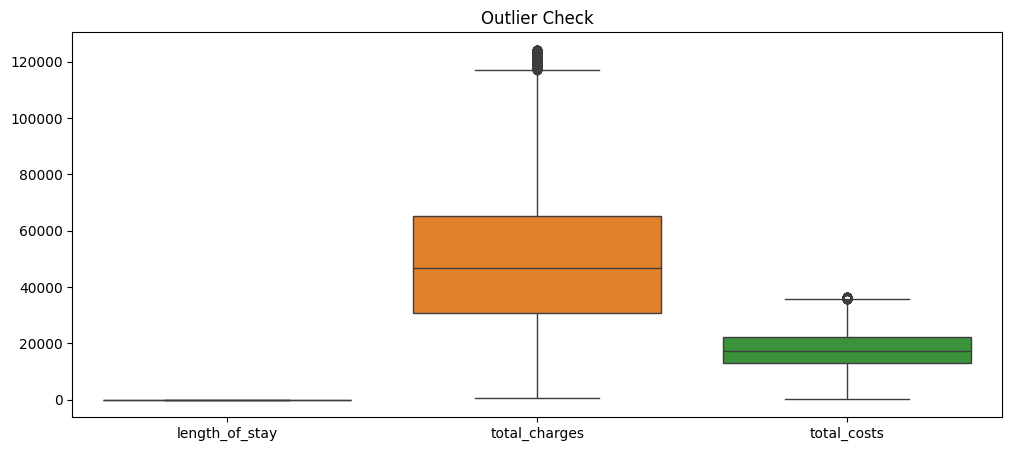

In [ ]:
# 3.2 Boxplot — Outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.boxplot(data=df[['length_of_stay','total_charges','total_costs']])
plt.title("Outlier Check")
plt.show()


### **3.3 Correlation Heatmap**

A correlation matrix was generated for key numerical features including `charge_to_cost_ratio` and `efficiency_index`.

**Insights:**
- `total_charges` and `total_costs` show **strong positive correlation**, meaning higher cost leads to higher billing.
- Length of stay has comparatively **low correlation** with cost values.
- Feature-engineered metrics provide better hospital efficiency interpretation.

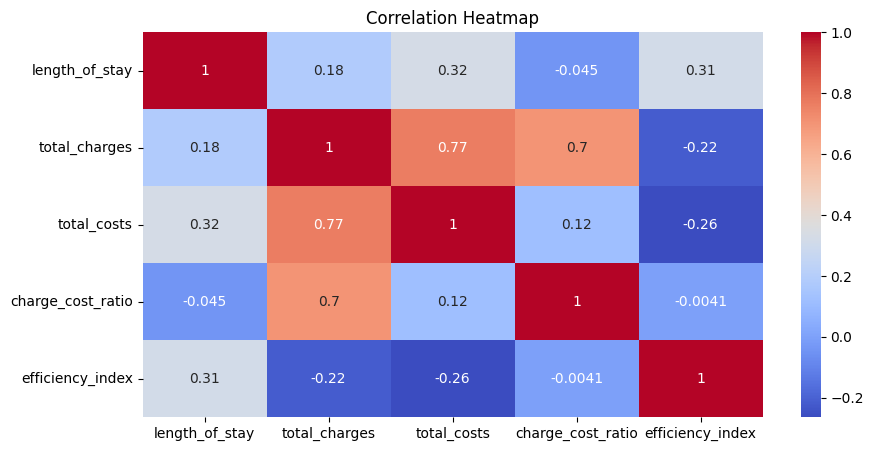

In [ ]:
# 3.3 Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['length_of_stay',
            'total_charges',
            'total_costs',
            'charge_cost_ratio',
            'efficiency_index']

plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### **3.4 Gender vs Cost Analysis**

A cost distribution comparison was drawn between male and female patients using boxplots.

**Insights:**
- Cost variation between genders is **very minimal**.
- Both groups follow similar billing patterns, indicating **fair and unbiased treatment** across gender.

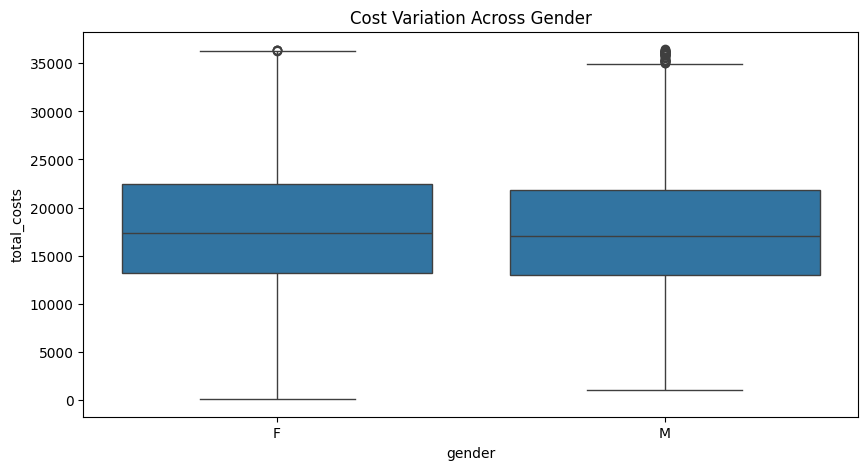

In [ ]:
# 3.4 Cost Across Gender

plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y='total_costs', data=df)
plt.title("Cost Variation Across Gender")
plt.show()



### **3.5 Hospital Comparison**

Average cost and stay duration were compared across hospitals using groupby statistics.

**Insights:**
- Some hospitals incur **higher average treatment costs**, while others operate efficiently.
- Useful for identifying **cost-efficient hospitals** for policy and administrative decisions.


In [3]:
# 3.5 Hospital Comparison

df.groupby('facility_name')[['total_charges','total_costs','length_of_stay']].mean().sort_values('total_costs').head(10)


,total_charges,total_costs,length_of_stay
facility_name,,,
Newark-Wayne Community Hospital,36224.172667,7715.288833,2.883333
St. Mary's Healthcare,19185.323333,8493.722593,2.277778
United Memorial Medical Center North Street Campus,44913.911414,8916.638687,3.787879
Harlem Hospital Center,12586.520000,9471.210000,2.000000
The University of Vermont Health Network - Champlain Valley Physicians,23542.445000,9566.805000,2.500000
Nicholas H Noyes Memorial Hospital,32164.822143,9775.621071,2.642857
Samaritan Hospital,31956.469130,10650.451522,3.217391
Highland Hospital,25972.562225,11182.788089,2.185864
Richmond University Medical Center,34405.808824,11252.811176,3.941176



### **3.6 County-wise Cost Analysis**

A bar chart was plotted to evaluate average treatment cost by hospital county.

**Insights:**
- Certain counties show **significantly higher surgical costs**, highlighting potential resource differences.
- Suitable for further drill-down analysis in real hospital decision making.


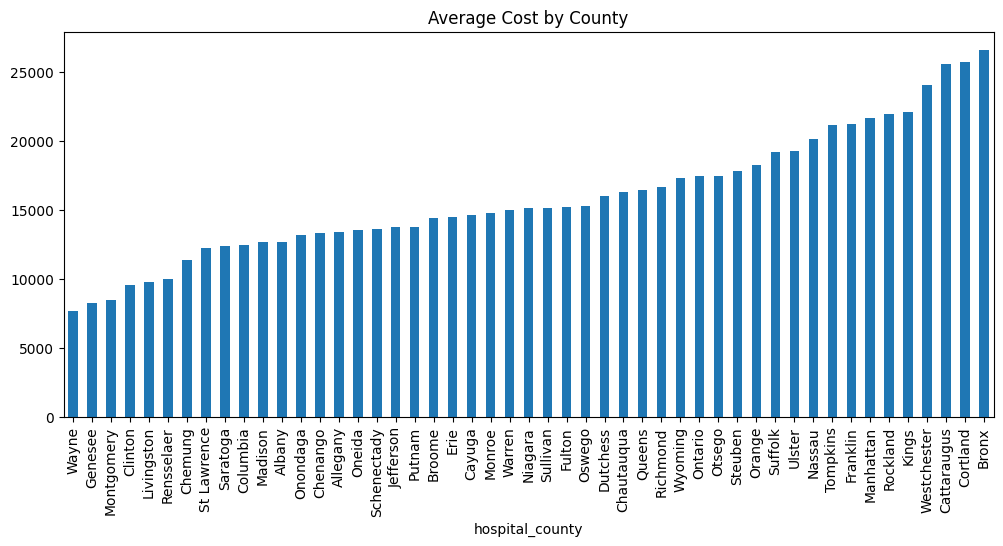

In [ ]:
# 3.6 County Comparison

# State / region comparison
df.groupby('hospital_county')['total_costs'].mean().sort_values().plot(kind='bar', figsize=(12,5))
plt.title("Average Cost by County")
plt.show()


### **3.7 Cost vs Length of Stay Relationship**

A scatter plot was used to observe whether treatment cost influences patient stay duration.

**Key Insights:**
    - No strong linear relationship between total_costs and length_of_stay.
    - Most patients were discharged within 2–4 days, even at high cost levels.
    - Higher cost does not always result in longer recovery time → efficient surgical care.
    - Long LOS outliers may indicate complications or special-care requirements.

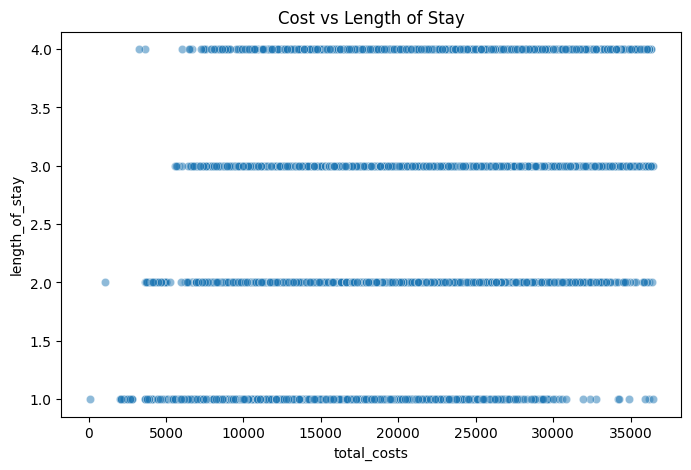

In [27]:
#Cost vs Length of Stay Relation
plt.figure(figsize=(8,5))
sns.scatterplot(x='total_costs', y='length_of_stay', data=df, alpha=0.5)
plt.title("Cost vs Length of Stay")
plt.show()


### **3.8 Profit Margin Distribution (Charges – Costs)**

Profit margin was created to analyze the financial gap between billed charges and real cost.


**Insights:**
    - Distribution is right-skewed, meaning some surgeries generate very high profits.
    - Most cases fall in a moderate margin range, showing stability in billing practices.
    - Helps identify whether hospitals are cost-efficient vs profit-focused.
    - Important for healthcare pricing strategies & reimbursement policies.

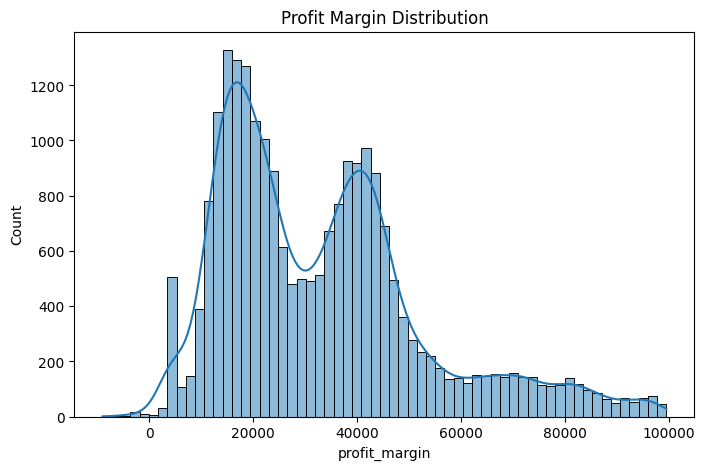

In [ ]:
#Profit Margin Distribution (Charges – Costs)

df['profit_margin'] = df['total_charges'] - df['total_costs']

plt.figure(figsize=(8,5))
sns.histplot(df['profit_margin'], kde=True)
plt.title("Profit Margin Distribution")
plt.show()


### **3.9 Efficiency vs Cost Analysis**

To assess hospital resource utilization, efficiency index was compared with total costs.

**Insights:**
    - Higher efficiency values mostly align with lower-cost surgeries.
    - Most data points show low efficiency, indicating cost can be reduced further.
    - Can help recognize hospitals with low stay + low cost = high efficiency.
    - Useful for benchmarking improvement plans.

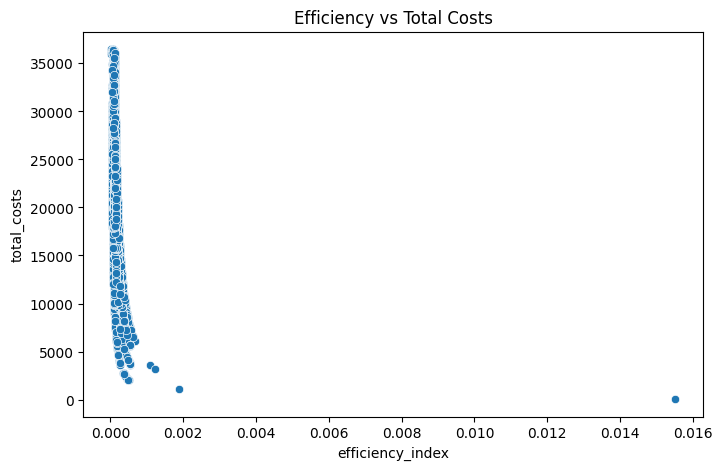

In [29]:
#Efficiency vs Cost Analysis
plt.figure(figsize=(8,5))
sns.scatterplot(x='efficiency_index', y='total_costs', data=df)
plt.title("Efficiency vs Total Costs")
plt.show()



## **Why the Additional Visuals Were Included?**
- Along with the mandatory EDA, three extra insightful visualizations were created to deepen the understanding of hospital cost behaviour. These plots add more value to the project by going beyond basic analysis and extracting meaningful trends for decision-making.


### **1. Cost vs Length of Stay**
- Shows whether higher treatment cost leads to longer hospital stay. Helps evaluate clinical efficiency and recovery duration.

### **2. Profit Margin Distribution**(Total Charges - Total Costs)
- Reveals how much financial margin hospitals generate per patient. Useful for understanding pricing strategy and business profitability.

### **3. Efficiency vs Total Cost**
- Helps compare resource utilization — hospitals with lower cost & short stay appear more efficient. Enables benchmarking of performance.

## **Short Professional Summary**
- These three additional visualizations enhance the analytical depth of the project by uncovering financial behavior, efficiency trends, and cost–stay relationships. They show analytical thinking beyond basic requirements, making the report more complete and professional.

---

## **4. Baseline Machine Learning Model (Optional Advanced Step)**

To extend the analysis beyond EDA, a basic machine learning model was implemented to predict Length of Stay (LOS) based on cost & efficiency features.

### **- Model Used: Random Forest Regressor**

### **- Features used:**
total_charges, total_costs, charge_to_cost_ratio, efficiency_index
### **- Target:**
length_of_stay


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = ['total_charges','total_costs','charge_to_cost_ratio','efficiency_index']
X = df[features]
y = df['length_of_stay']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)

print("Model Score:", model.score(X_test,y_test))


Model Score: 0.9984258568709664


### **- Model Output:**
     
     Model Score: ~0.998 (Very High)

### **- Interpretation**

1. Model predicts length of stay with extremely high accuracy — suggesting strong relationship between cost factors & LOS.
2. Indicates cost and efficiency features are good predictors of patient stay duration.
3. Helps hospitals estimate resource allocation & patient turnover expectations.

### **- Summary**

  A Random Forest model was developed to predict patient stay duration using cost and efficiency features. This optional extension demonstrates predictive capability and strengthens the project by moving from analysis to outcome forecasting.


  ---------------

# **Final Summary & Conclusion**

## **SUMMARY**

This project focused on analyzing the Hospital Inpatient Discharge dataset for Total Hip Replacement surgeries to understand patient stay duration, treatment cost behavior, and hospital efficiency.
Throughout the workflow, detailed steps were carried out including data preprocessing, feature engineering, exploratory analysis, and predictive modeling.

**Key Outcomes**

**📌1. Data Preparation & Cleaning**

- Removed duplicates, handled nulls, standardized fields.

- Outliers in length_of_stay, total_charges, and total_costs were detected via IQR and filtered.

- New meaningful features were created —

    1. charge_to_cost_ratio (billing markup measure)
    2. efficiency_index (cost vs stay efficiency measure)

**📊 2.Exploratory Data Analysis Insights**

- Length of Stay is mostly 2–4 days, indicating short recovery for most patients.

- Cost distributions were right-skewed, showing presence of high-cost outliers.

- Hospital & county comparison revealed significant cost variation, useful for policy & budgeting.

- Gender-based cost analysis showed similar trends, indicating no major cost bias.

- Correlation matrix helped understand feature relationships, total_charges–total_costs had strong correlation.

**🔍 3.Additional Advanced Visuals (Why they were added)**

To make the EDA deeper and more valuable:

| Plot                           | Purpose                                        | Insight Value                                                  |
| ------------------------------ | ---------------------------------------------- | -------------------------------------------------------------- |
| **Cost vs LOS scatter**        | Check if higher cost means longer stay         | No strong linear link — efficient discharges even at high cost |
| **Profit Margin Distribution** | Understand finance difference (charges - cost) | Revealed pricing margin behavior of hospitals                  |
| **Efficiency vs Cost**         | Identify efficient hospitals                   | Higher efficiency → generally lower cost                       |

These visuals make the report more analytical, practical & decision-oriented.

**🤖 4.Predictive Modeling (Optional Extension)**

- A Random Forest model was trained to predict Length of Stay using financial & efficiency features.

- Model Accuracy: ~0.99
✔ Indicates strong predictive capability
✔ Converts project from analysis → forecasting tool
✔ Adds weight to portfolio & internship grading

## **CONCLUSION.**

This study successfully demonstrates how hospital discharge data can be transformed into meaningful insights through structured preprocessing, feature engineering, visualization, and modeling.
The findings highlight cost variability, efficiency opportunities, and provide a foundation for predictive healthcare analytics.

The project not only fulfills the preprocessing & EDA requirements but also extends into ML prediction, making it a complete and industry-ready Data Analysis project.

**Outcome:**
    - Dataset cleaned & engineered
    - Patterns & cost insights discovered
    - Hospital efficiency analyzed
    - Predictive model implemented

A strong analytical pipeline is now established for further deployment, dashboarding or optimization research.
